In [1]:
# Using Random Forest for Classification(Using Inbuilt Model)
# Problem Definition
# The task here is to predict whether a bank currency note is authentic or not based on four 
# attributes i.e. variance of the image wavelet transformed image, skewness, entropy, and 
# curtosis of the image.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("bill_authentication.csv")

In [4]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.tail()

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [6]:
df.shape

(1372, 5)

In [7]:
df.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [8]:
df.duplicated().sum()

24

In [9]:
df = df.drop_duplicates()

In [10]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1348 non-null   float64
 1   Skewness  1348 non-null   float64
 2   Curtosis  1348 non-null   float64
 3   Entropy   1348 non-null   float64
 4   Class     1348 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 63.2 KB


In [12]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712,0.452522
std,2.862906,5.868600,4.328365,2.085877,0.497925
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.786650,-1.627000,-1.545600,-2.393100,0.000000
50%,0.518735,2.334150,0.605495,-0.578890,0.000000
75%,2.853250,6.796025,3.199800,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [13]:
df.nunique()

Variance    1338
Skewness    1256
Curtosis    1270
Entropy     1156
Class          2
dtype: int64

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go 

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_columns)
object_columns = df.select_dtypes(include=['object']).columns
print("\nObject Columns:", object_columns)

Numerical Columns: Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

Object Columns: Index([], dtype='object')


In [17]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [18]:
df['Class'].value_counts()

0    738
1    610
Name: Class, dtype: int64

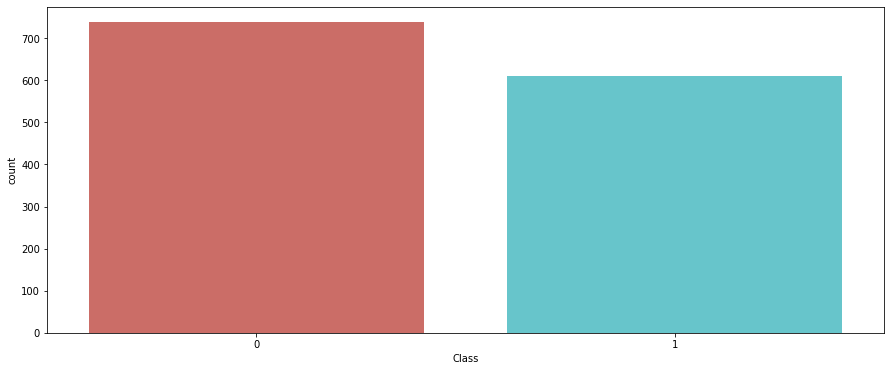

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(df['Class'], data = df, palette = 'hls')
plt.xticks(rotation = 0)
plt.show()

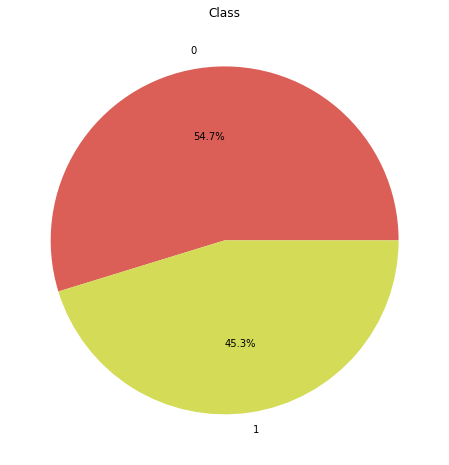

In [20]:
plt.figure(figsize=(20, 8))
counts = df['Class'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls'))
plt.title('Class')
plt.show()

In [21]:
continuous_columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy']

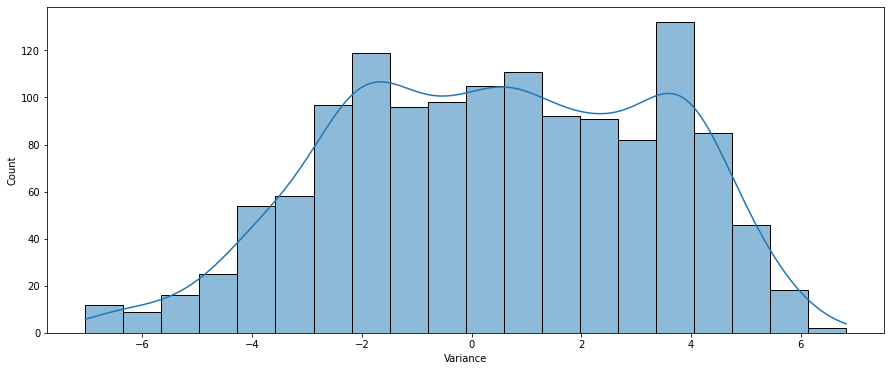

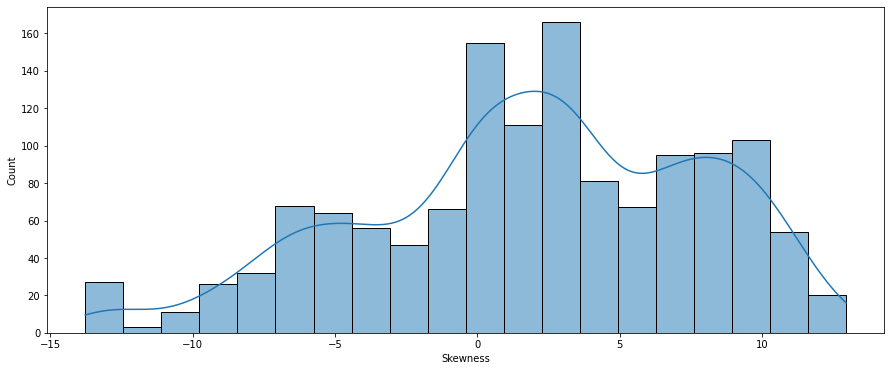

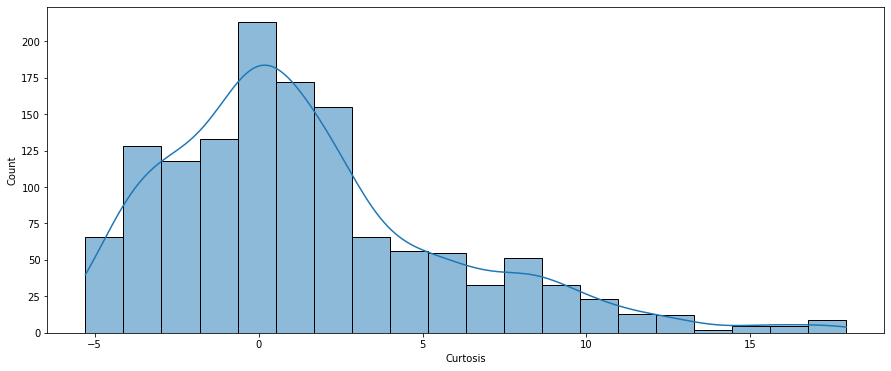

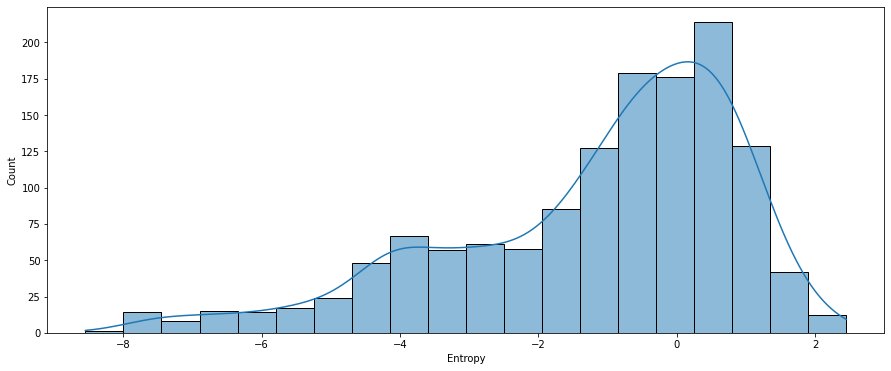

In [22]:
for i in continuous_columns:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], kde = True, bins = 20, palette = 'hls')
    plt.xticks(rotation = 0)
    plt.show()

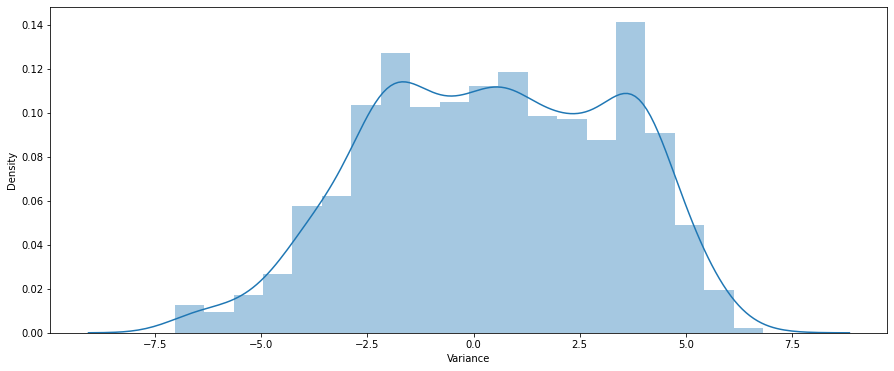

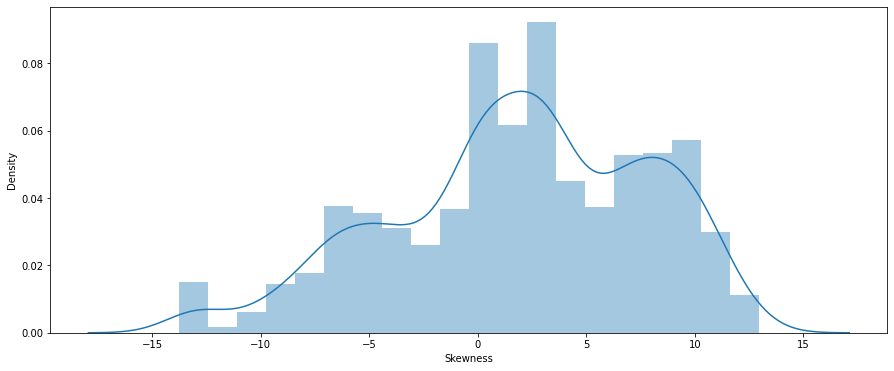

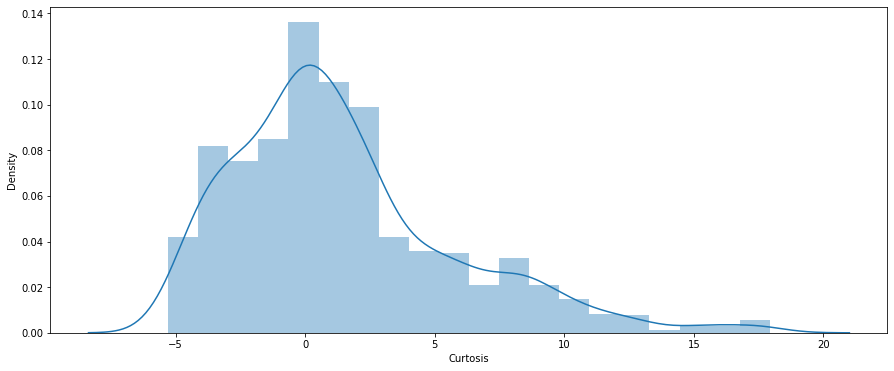

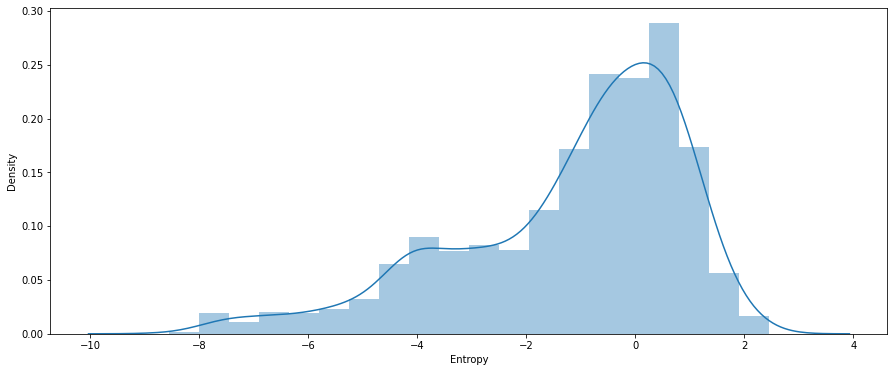

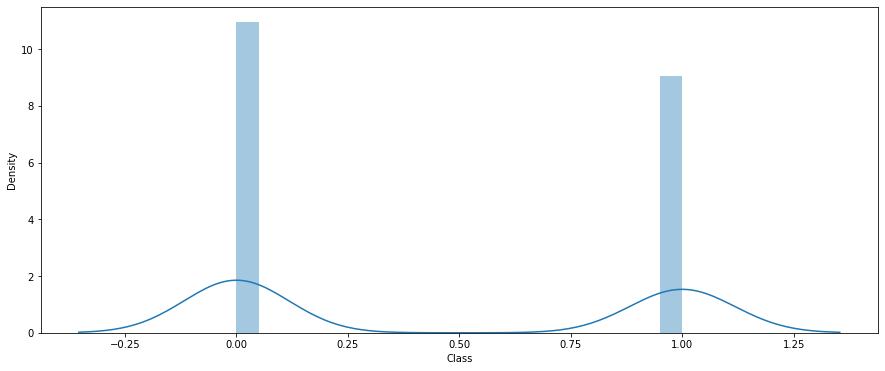

In [23]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], kde = True, bins = 20)
    plt.xticks(rotation = 0)
    plt.show()

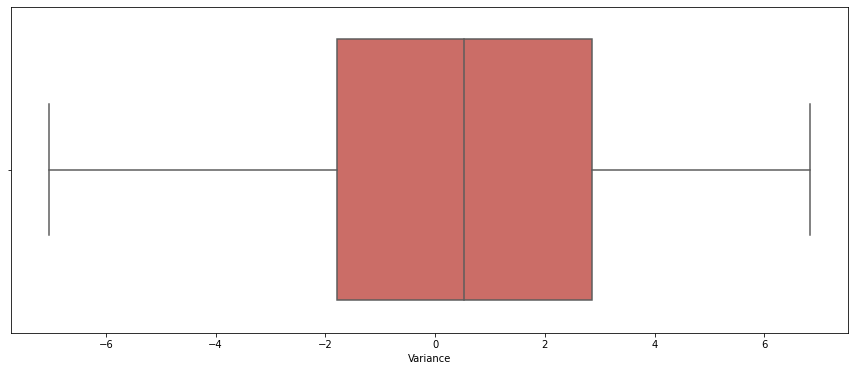

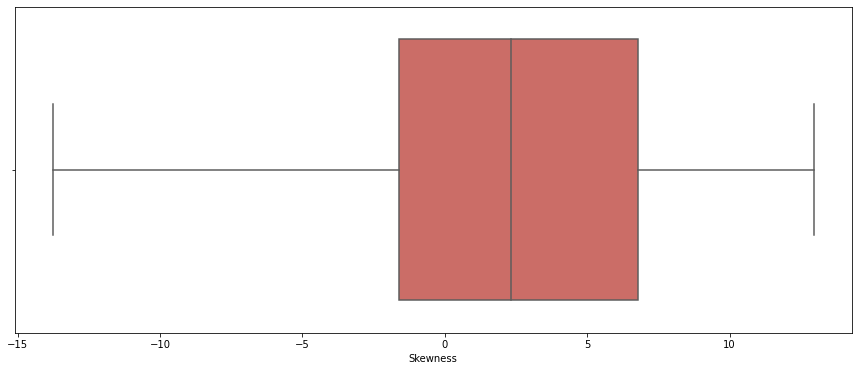

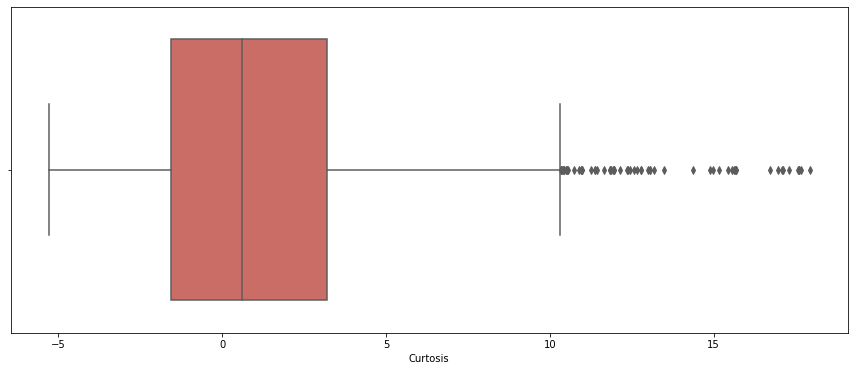

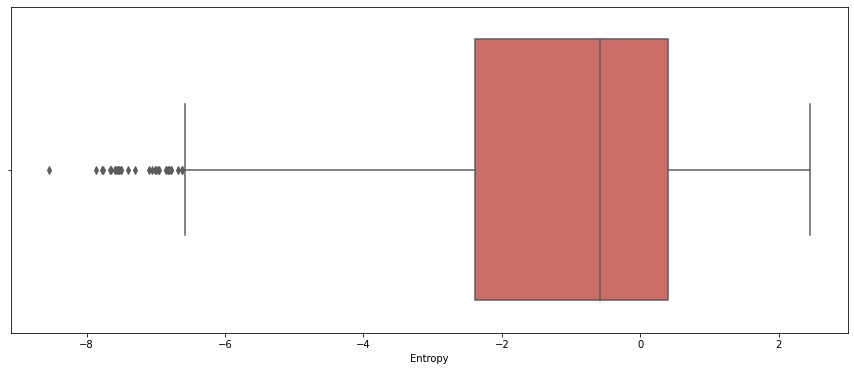

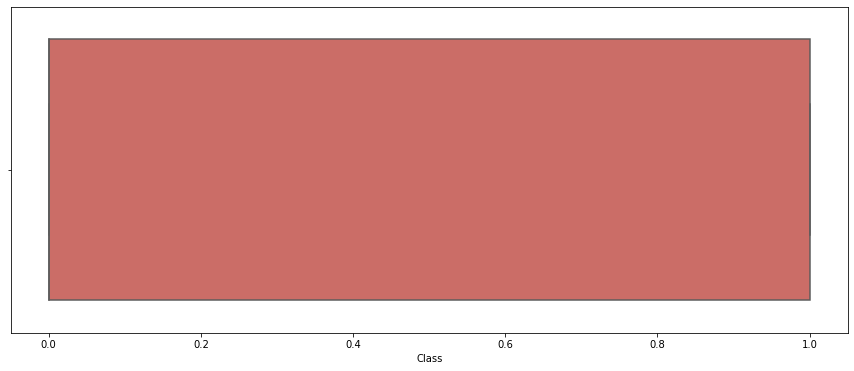

In [24]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(df[i], data = df, palette = 'hls')
    plt.xticks(rotation = 0)
    plt.show()

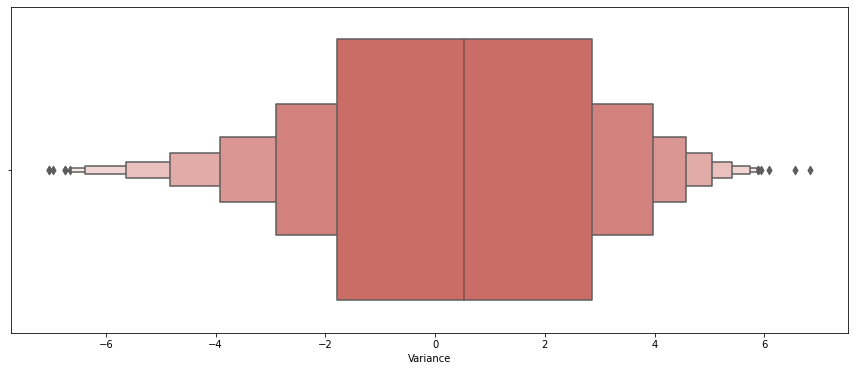

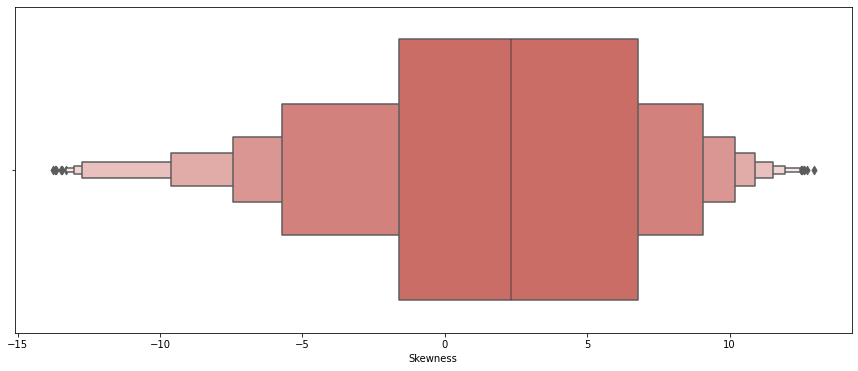

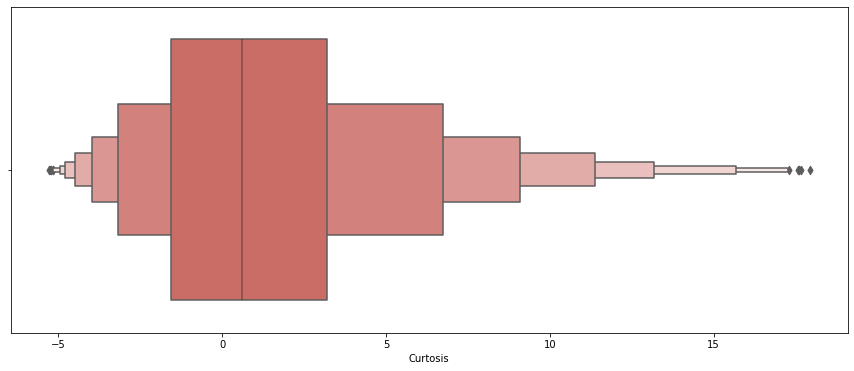

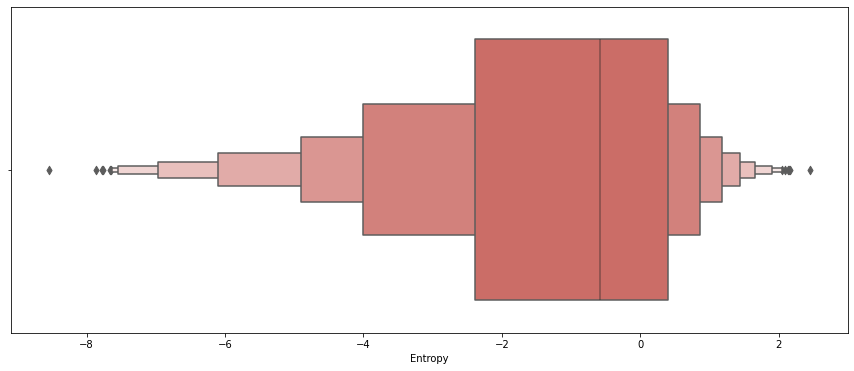

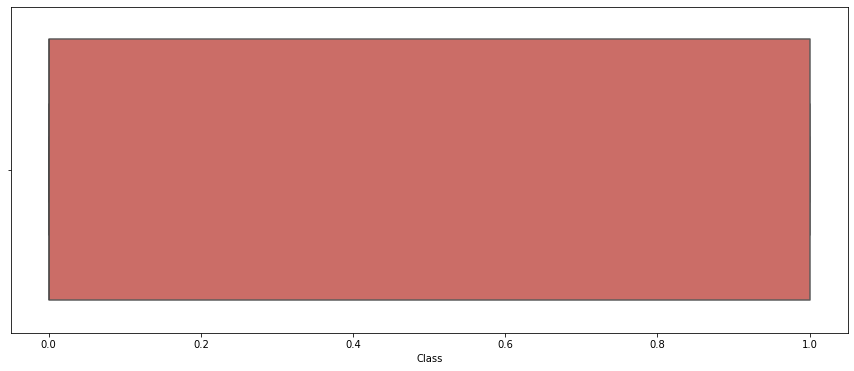

In [25]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    sns.boxenplot(df[i], data = df, palette = 'hls')
    plt.xticks(rotation = 0)
    plt.show()

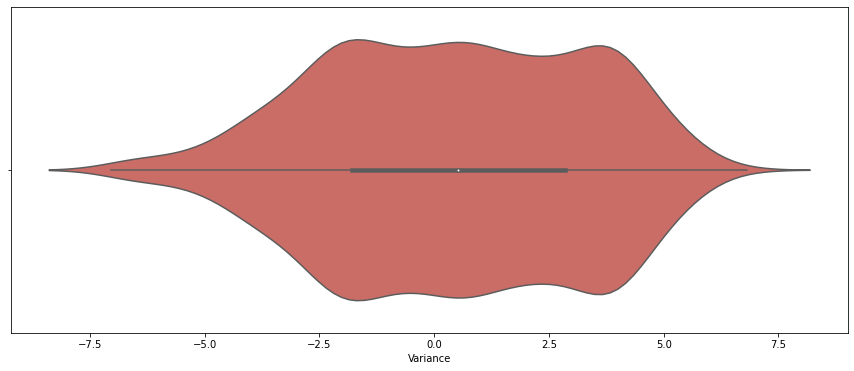

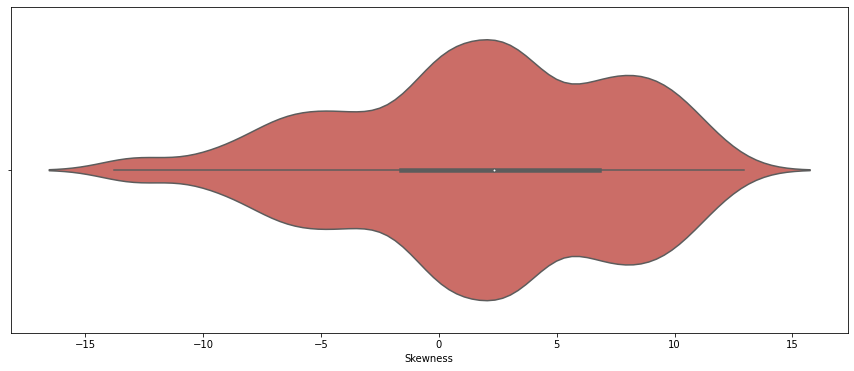

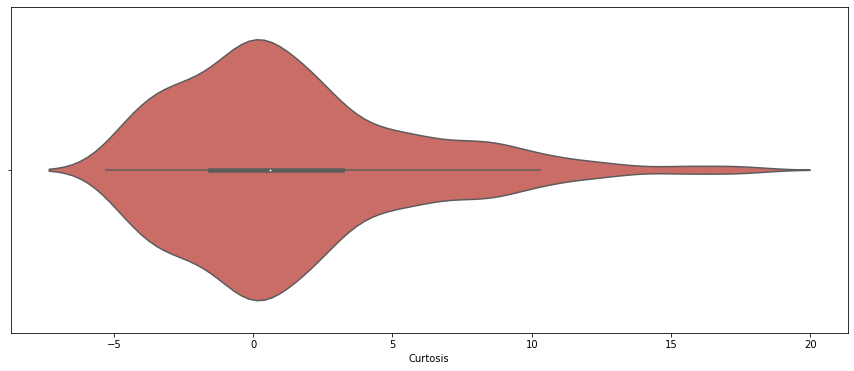

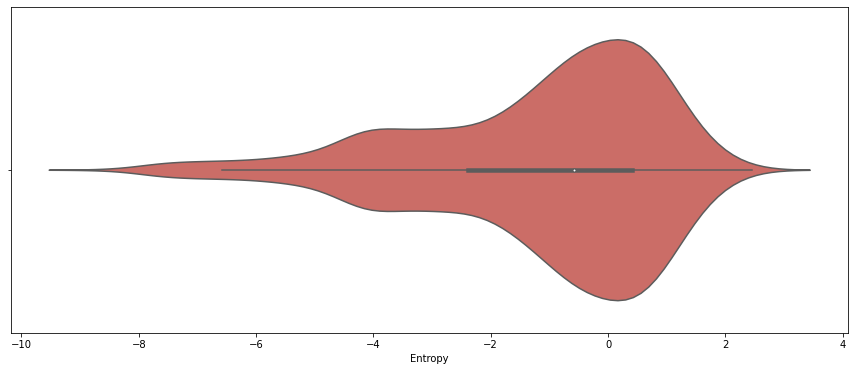

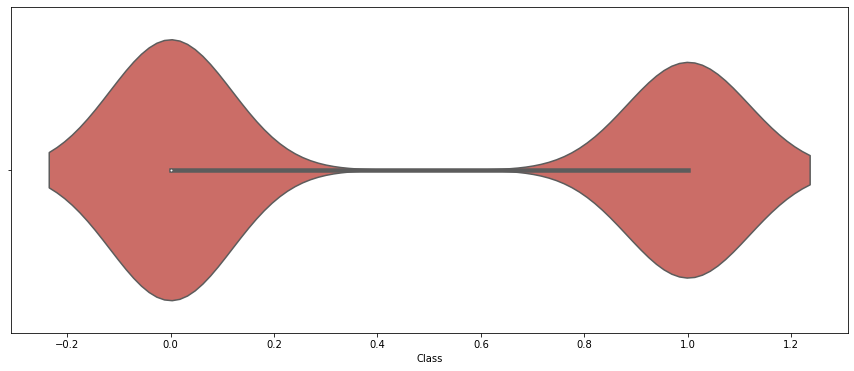

In [26]:
for i in df.columns:
    plt.figure(figsize=(15,6))
    sns.violinplot(df[i], data = df, palette = 'hls')
    plt.xticks(rotation = 0)
    plt.show()

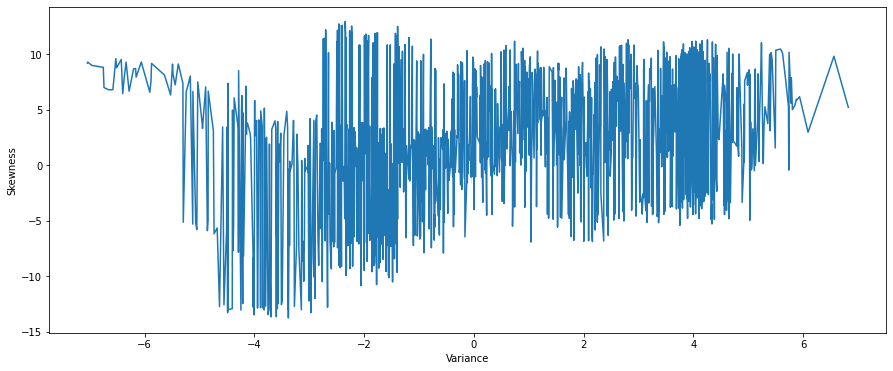

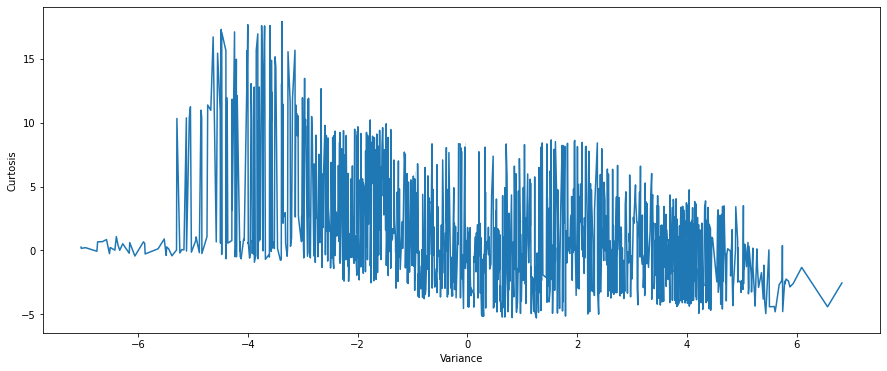

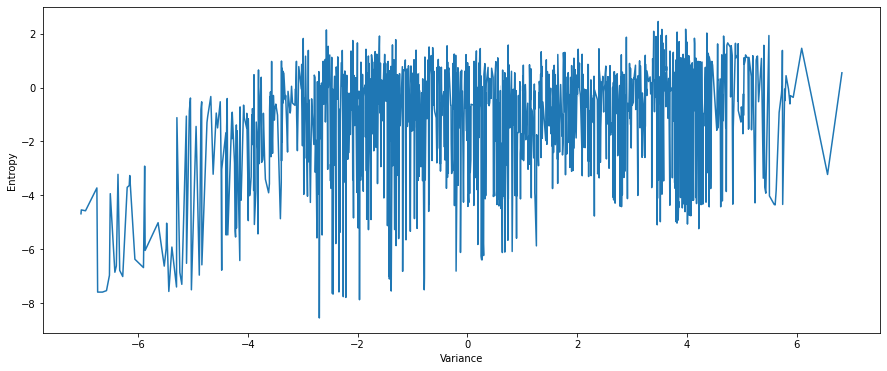

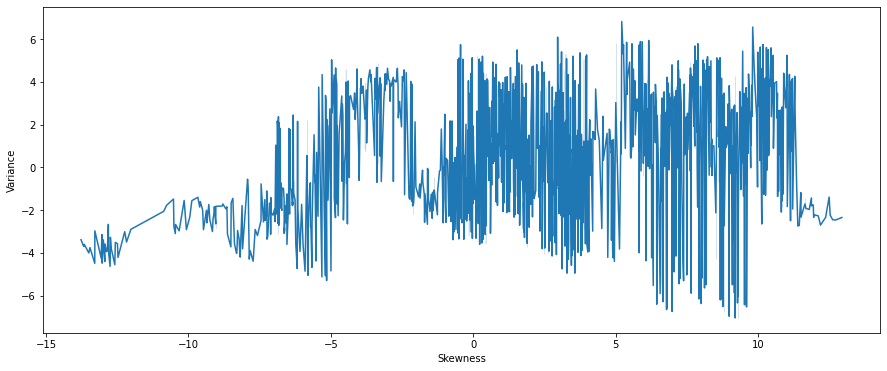

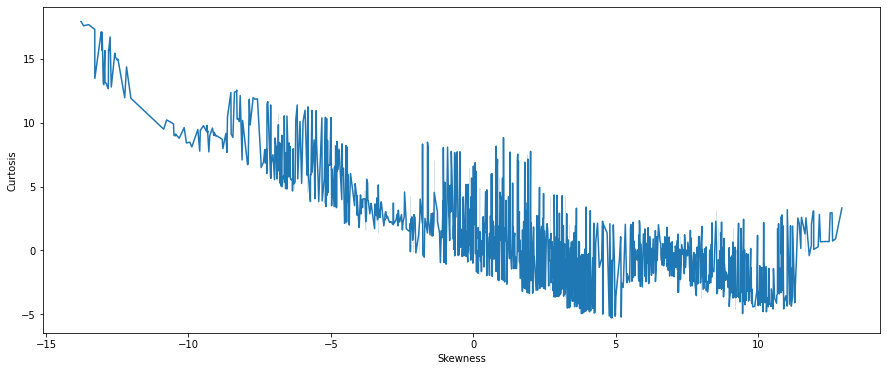

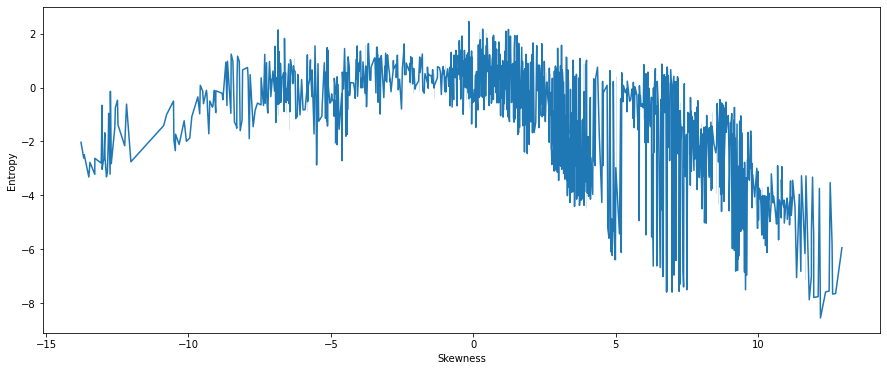

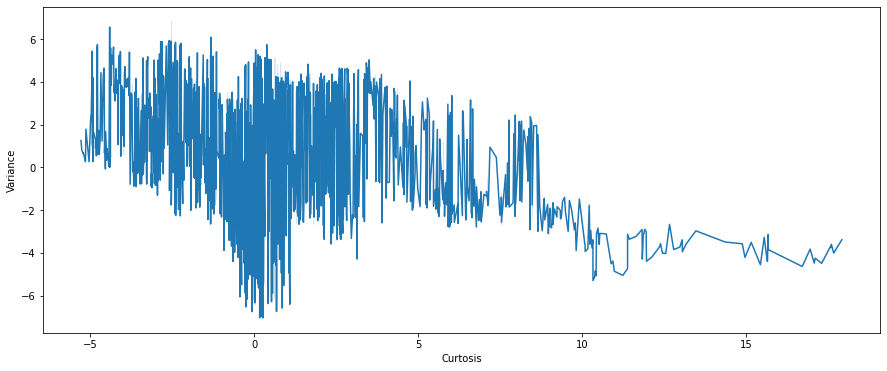

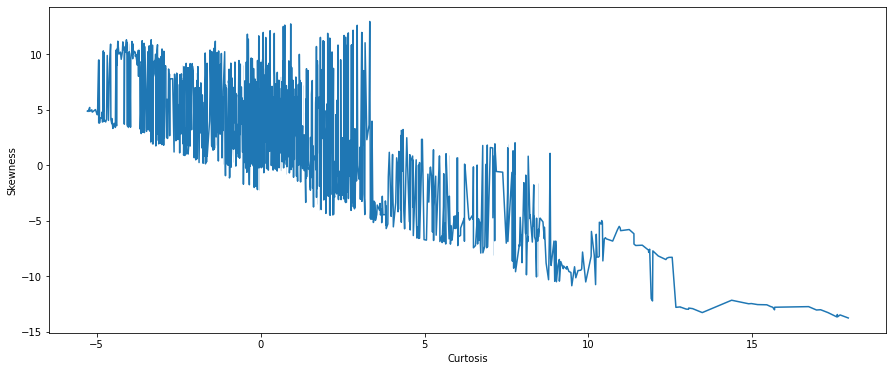

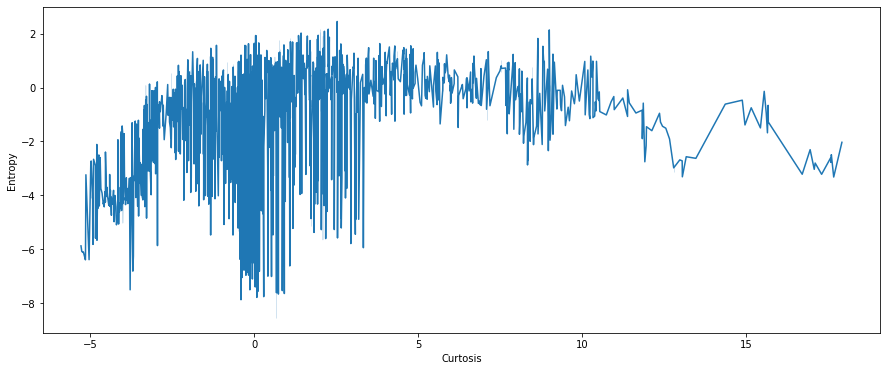

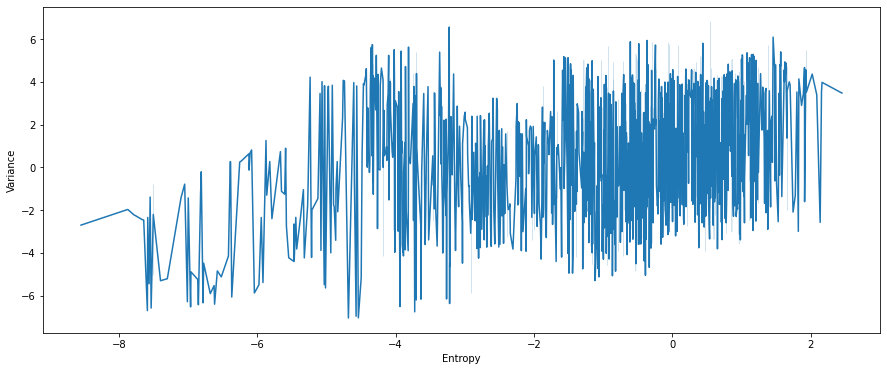

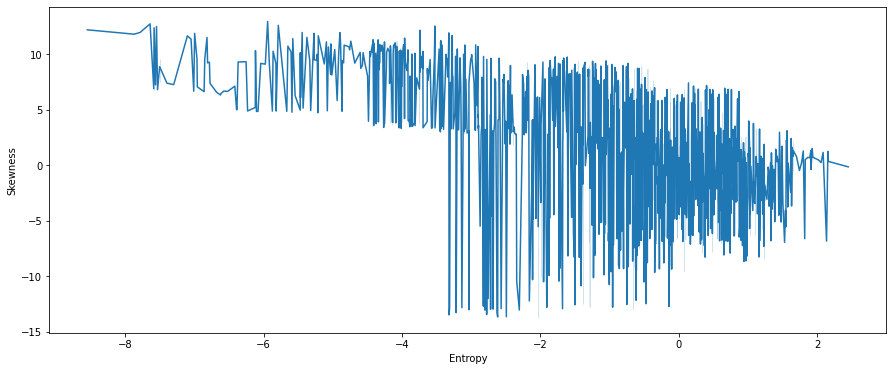

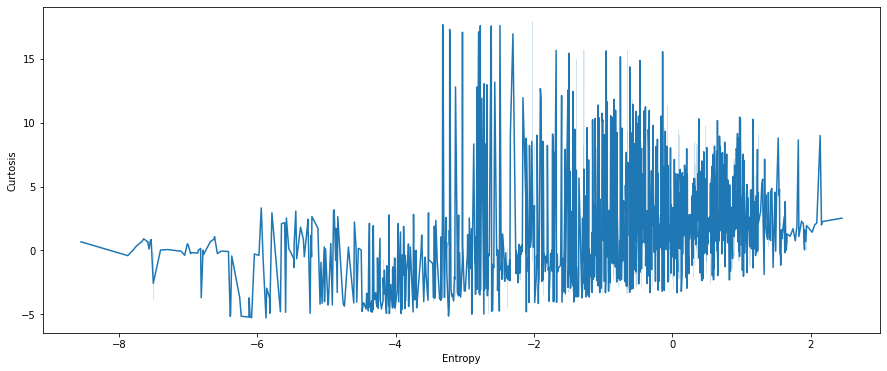

In [27]:
for i in continuous_columns:
    for j in continuous_columns:
        if i !=j:
            plt.figure(figsize=(15,6))
            sns.lineplot(x = df[i], y = df[j], data = df, palette = 'hls')
            plt.xticks(rotation = 0)
            plt.show()

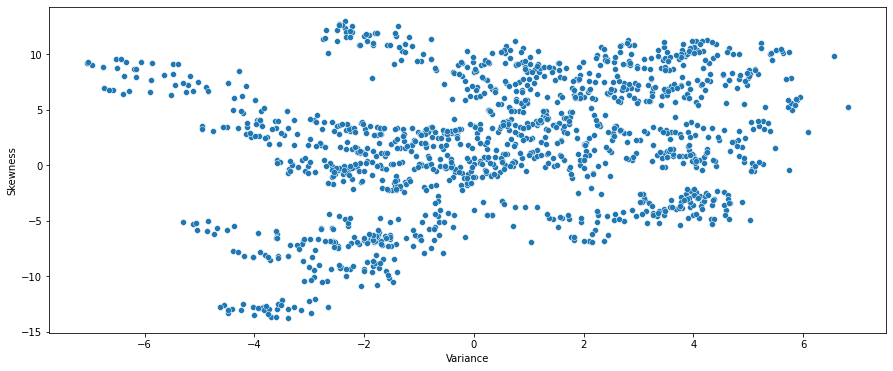

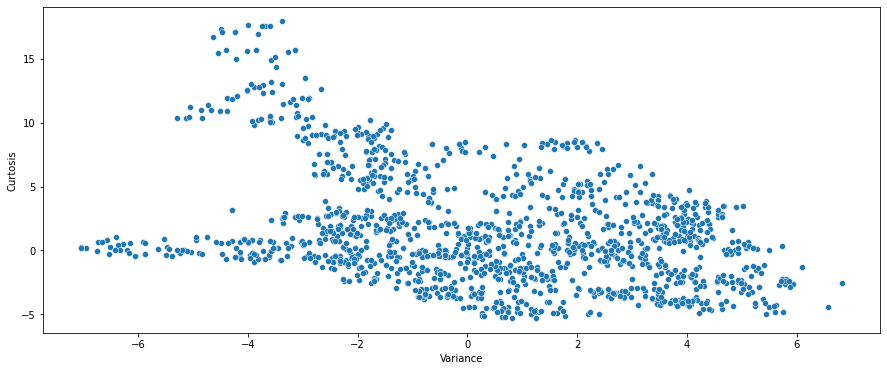

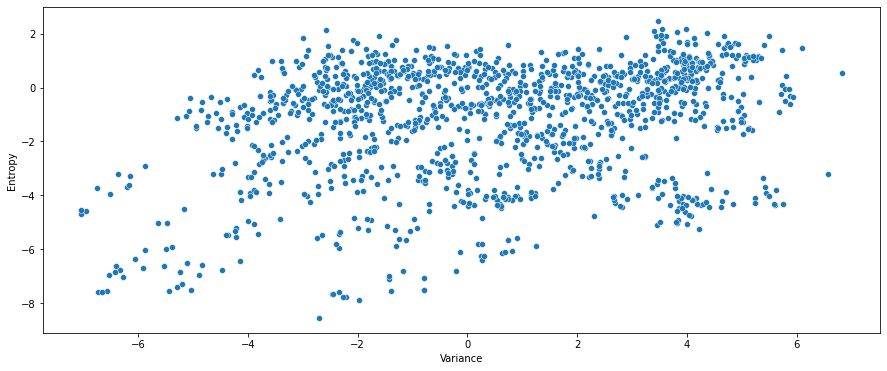

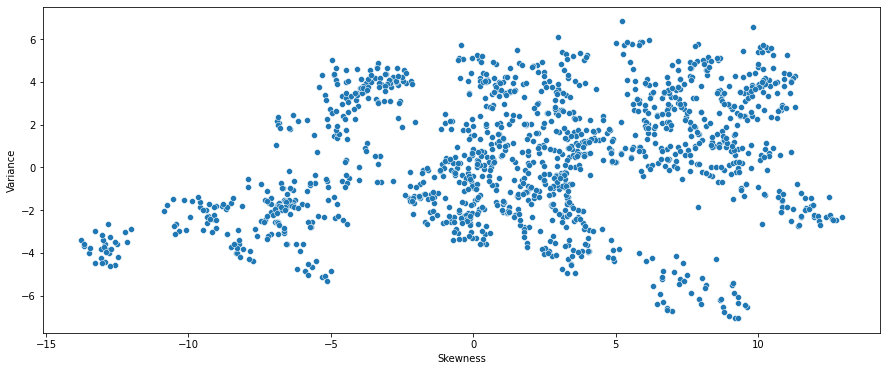

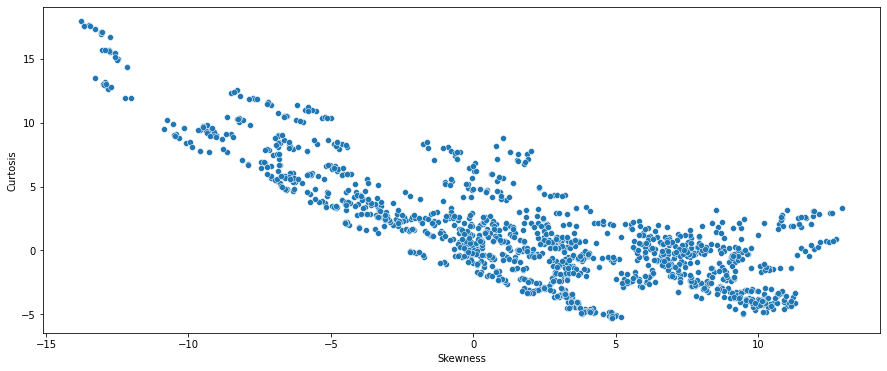

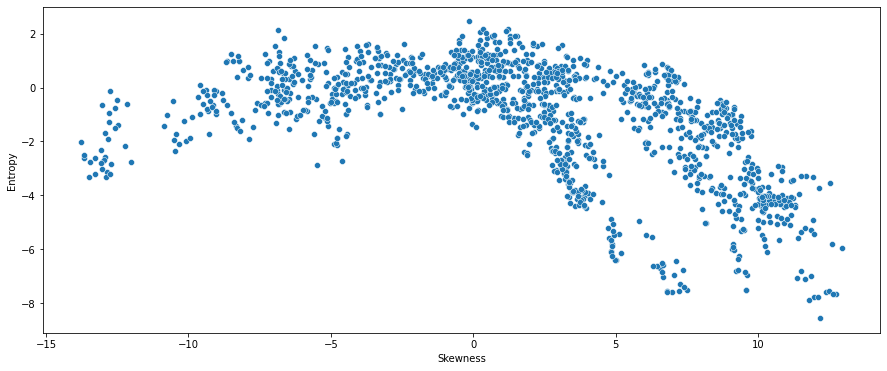

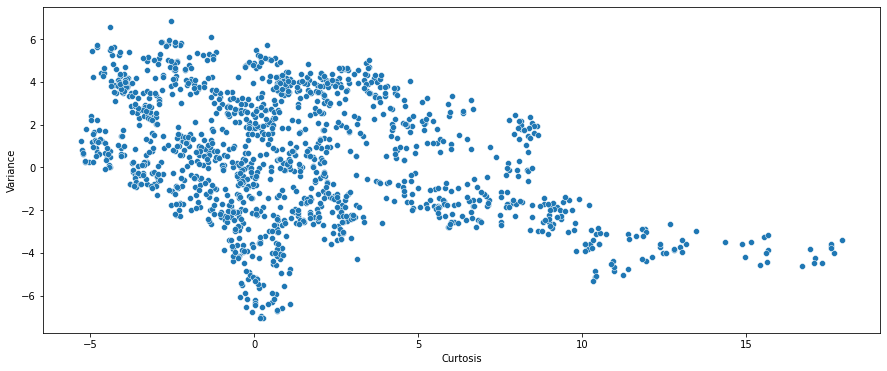

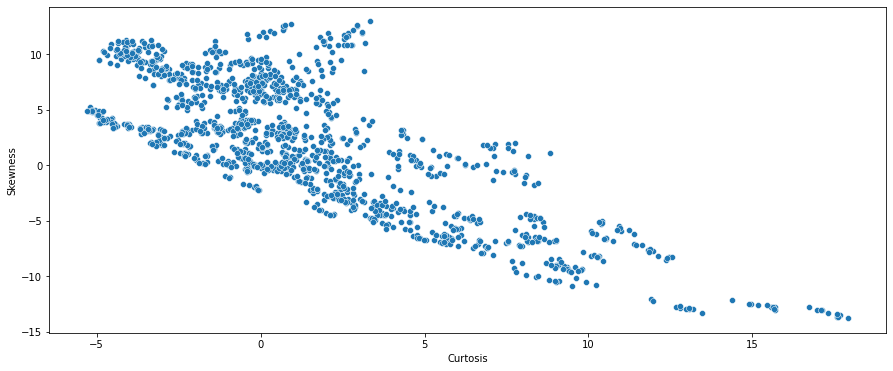

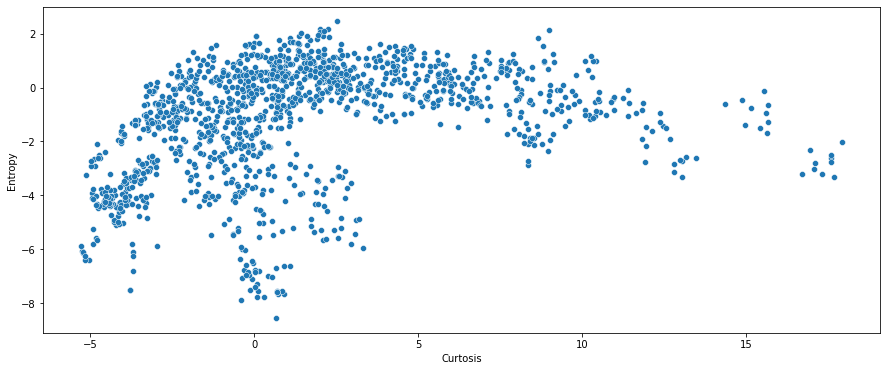

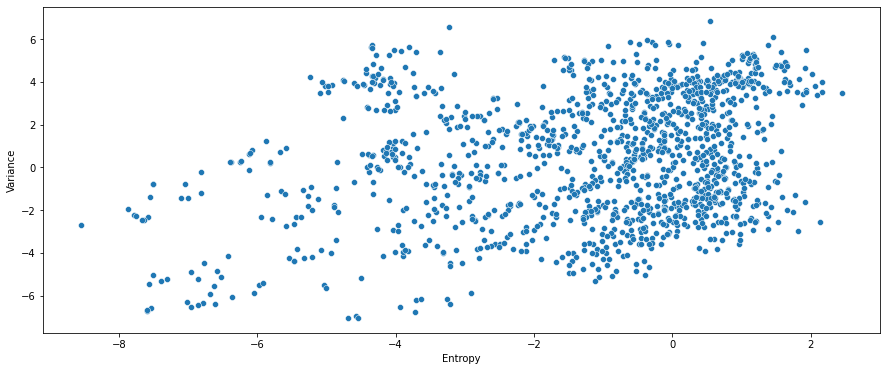

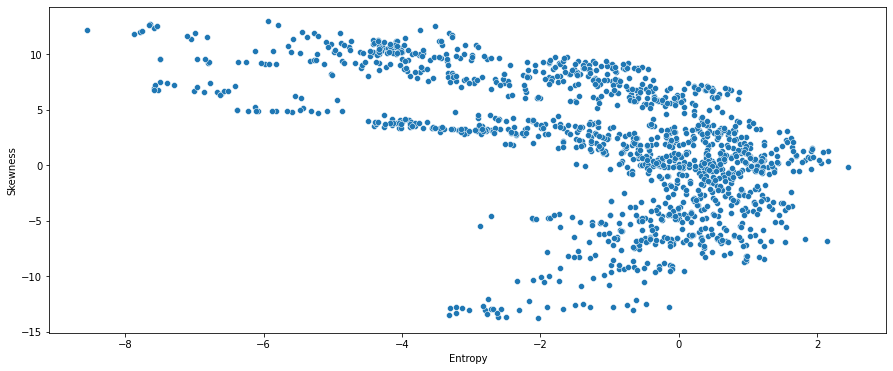

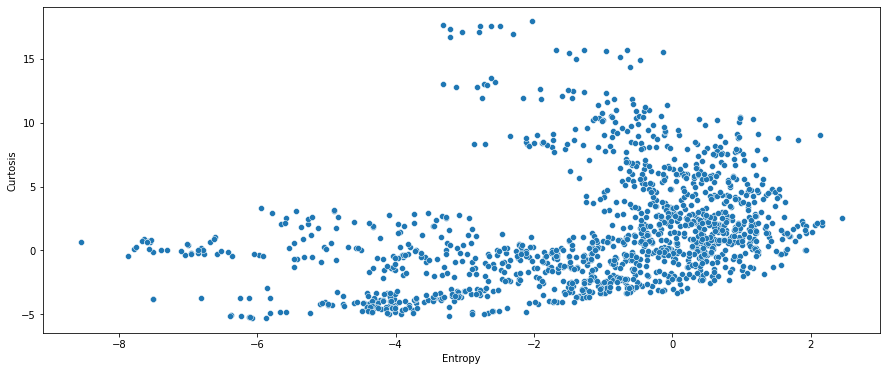

In [28]:
for i in continuous_columns:
    for j in continuous_columns:
        if i !=j:
            plt.figure(figsize=(15,6))
            sns.scatterplot(x = df[i], y = df[j], data = df, palette = 'hls')
            plt.xticks(rotation = 0)
            plt.show()

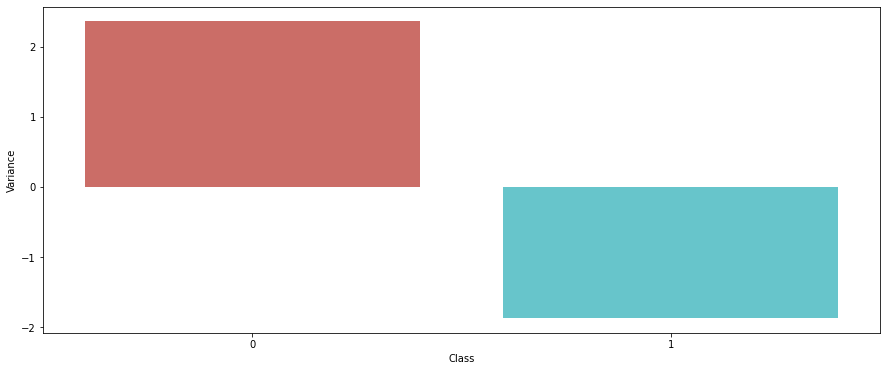

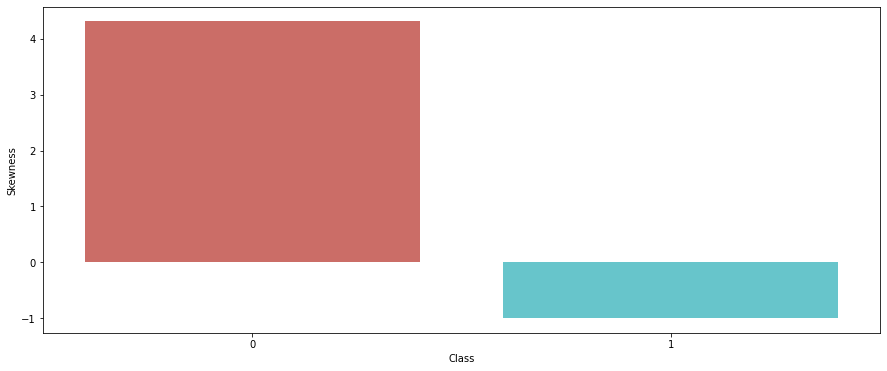

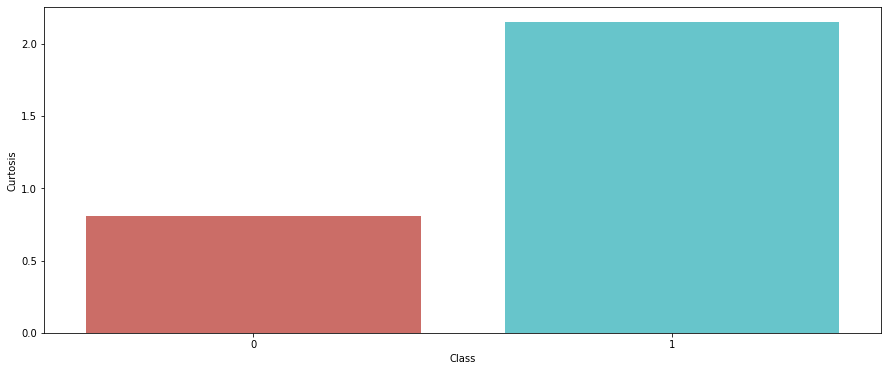

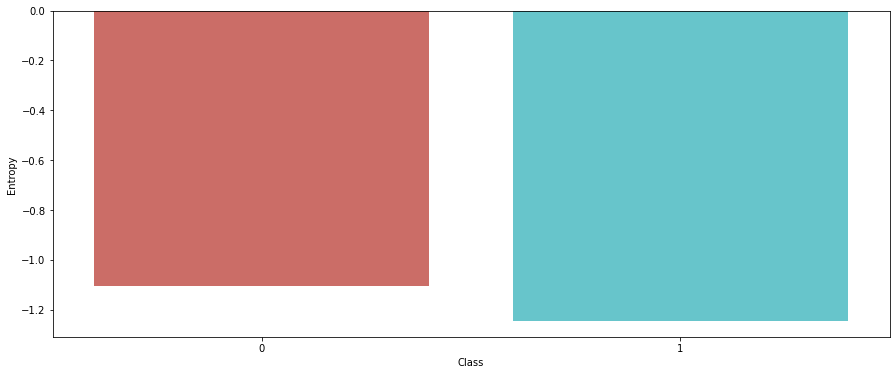

In [29]:
for i in df.columns:
    if i != 'Class':
        plt.figure(figsize=(15,6))
        sns.barplot(x = df['Class'], y = df[i], data = df, ci = None, palette = 'hls')
        plt.xticks(rotation = 0)
        plt.show()

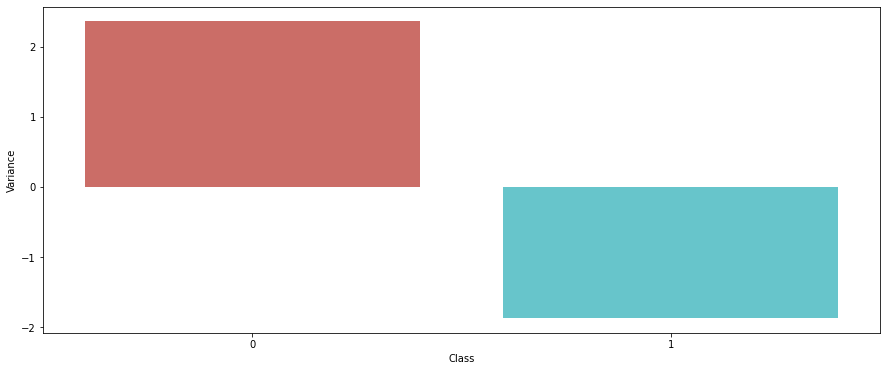

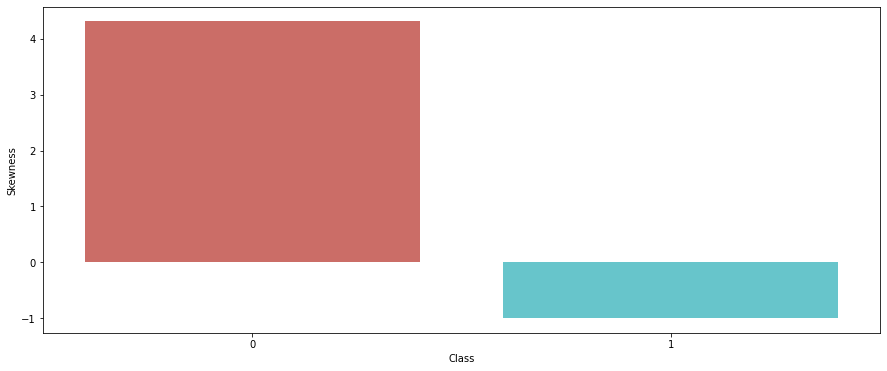

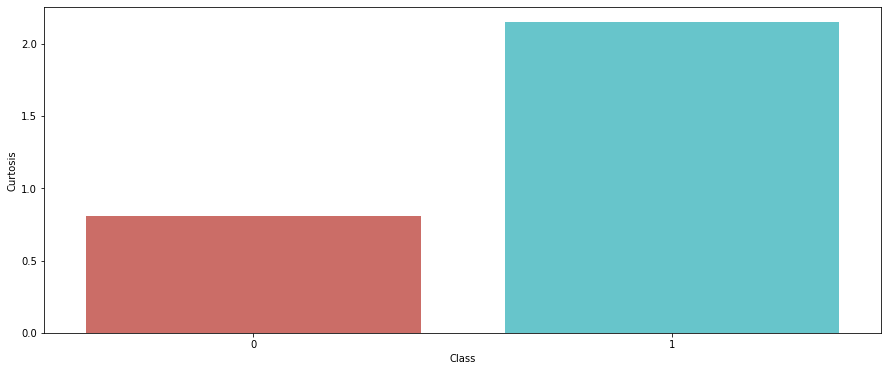

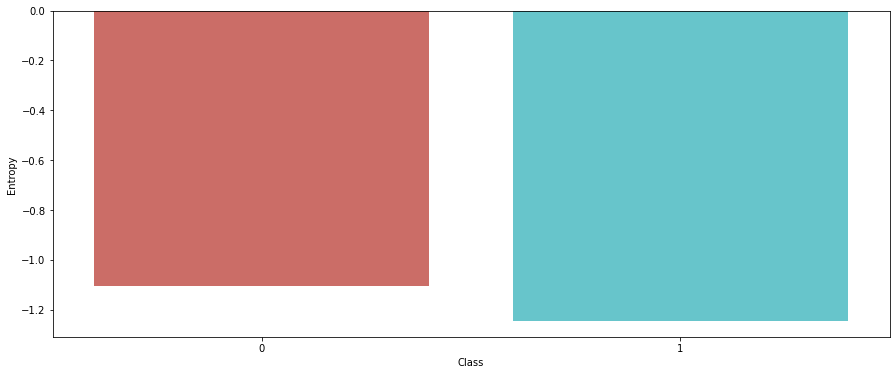

In [30]:
for i in continuous_columns:
    plt.figure(figsize=(15,6))
    sns.barplot(x = df['Class'], y = df[i], data = df, ci = None, palette = 'hls')
    plt.xticks(rotation = 0)
    plt.show()

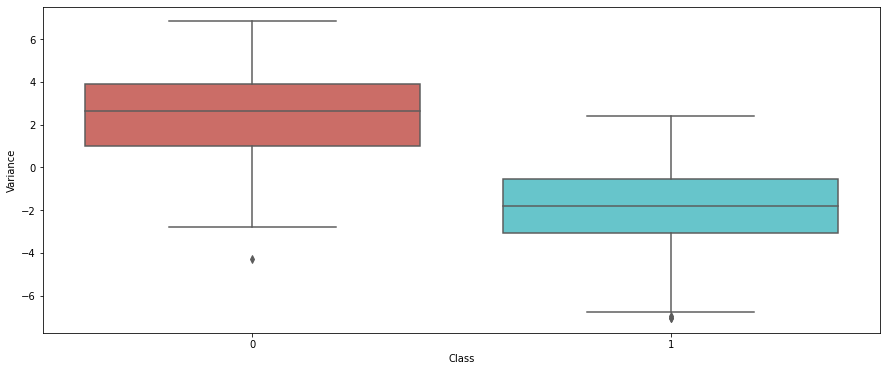

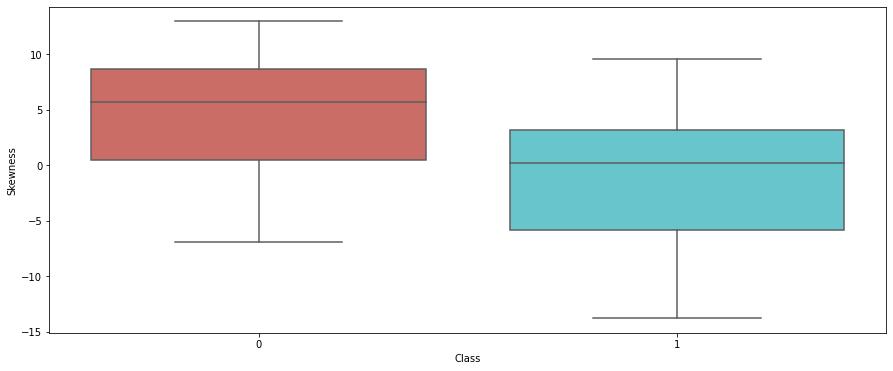

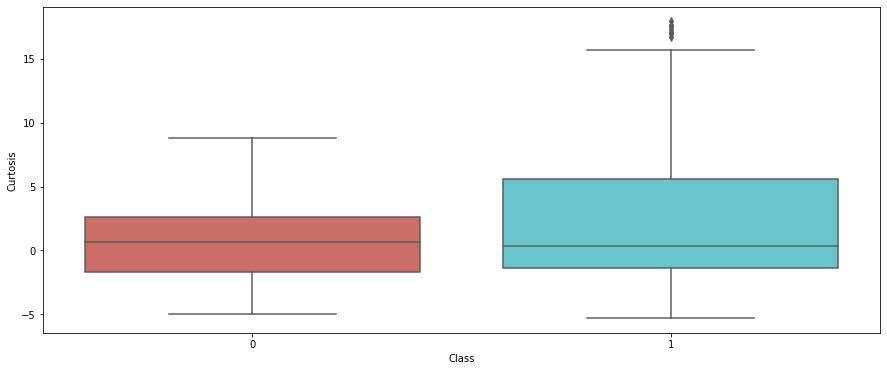

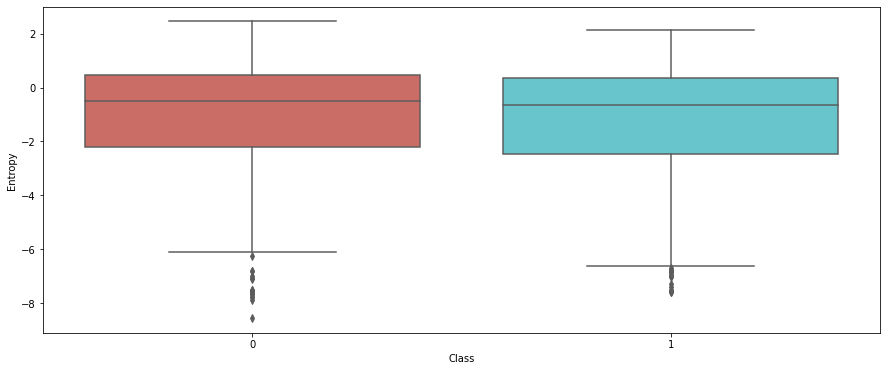

In [31]:
for i in df.columns:
    if i != 'Class':
        plt.figure(figsize=(15,6))
        sns.boxplot(x = df['Class'], y = df[i], data = df, palette = 'hls')
        plt.xticks(rotation = 0)
        plt.show()

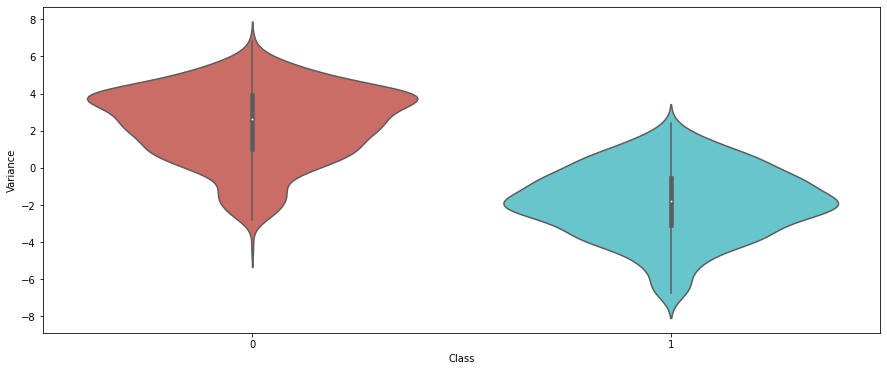

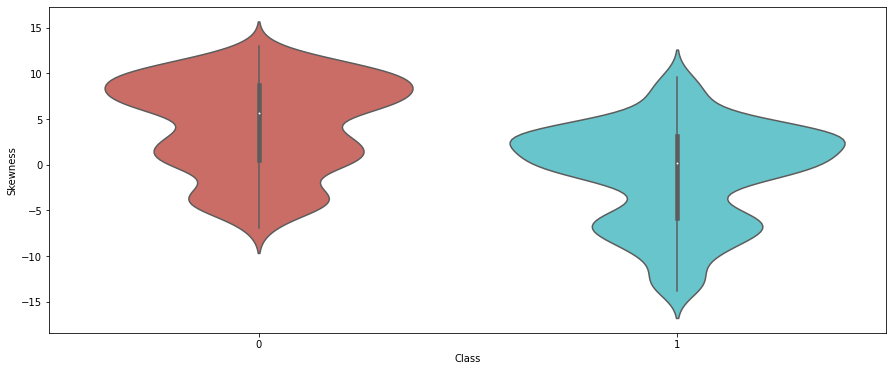

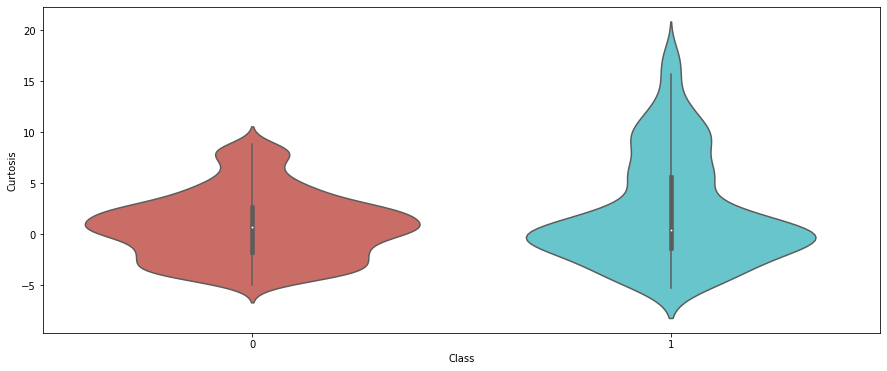

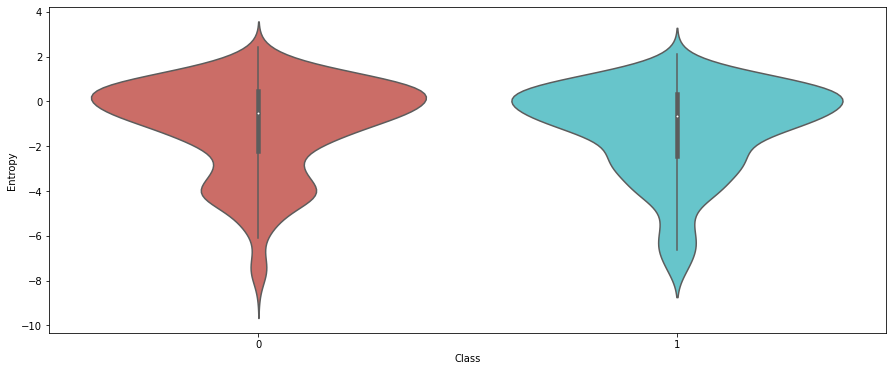

In [32]:
for i in df.columns:
    if i != 'Class':
        plt.figure(figsize=(15,6))
        sns.violinplot(x = df['Class'], y = df[i], data = df, palette = 'hls')
        plt.xticks(rotation = 0)
        plt.show()

In [33]:
correlation_matrix = df.corr()

In [35]:
correlation_matrix

,Variance,Skewness,Curtosis,Entropy,Class
Variance,1.000000,0.272863,-0.387171,0.273993,-0.735185
Skewness,0.272863,1.000000,-0.785376,-0.520293,-0.449835
Curtosis,-0.387171,-0.785376,1.000000,0.311379,0.154376
Entropy,0.273993,-0.520293,0.311379,1.000000,-0.033979
Class,-0.735185,-0.449835,0.154376,-0.033979,1.000000


In [36]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [37]:
df_new = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [38]:
X = df_new.drop(['Class', 'Curtosis'], axis = 1)
y = df_new['Class']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y,
                                                    random_state=0)

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [41]:
lr.fit(X_train, y_train)

LogisticRegression()

In [42]:
y_pred = lr.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[125  20]
 [ 16  91]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       145
           1       0.82      0.85      0.83       107

    accuracy                           0.86       252
   macro avg       0.85      0.86      0.85       252
weighted avg       0.86      0.86      0.86       252

0.8571428571428571


In [44]:
from sklearn.metrics import precision_recall_fscore_support

In [45]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.858201666712305
Recall: 0.8571428571428571
F1 Score: 0.857454472133371


In [46]:
import scikitplot as skplt

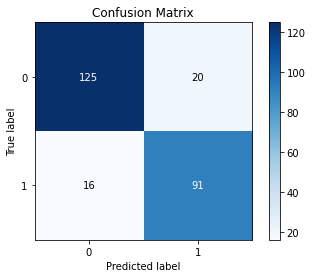

In [47]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[138   7]
 [ 10  97]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       145
           1       0.93      0.91      0.92       107

    accuracy                           0.93       252
   macro avg       0.93      0.93      0.93       252
weighted avg       0.93      0.93      0.93       252

0.9325396825396826


In [50]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.9325427762927763
Recall: 0.9325396825396826
F1 Score: 0.9324054668101383


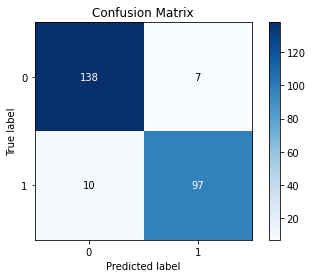

In [51]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

In [52]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[141   4]
 [  5 102]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       145
           1       0.96      0.95      0.96       107

    accuracy                           0.96       252
   macro avg       0.96      0.96      0.96       252
weighted avg       0.96      0.96      0.96       252

0.9642857142857143


In [54]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.9642718679614518
Recall: 0.9642857142857143
F1 Score: 0.9642632426863587


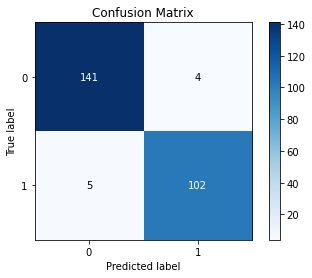

In [55]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
from sklearn.svm import SVC

In [58]:
classifier_svc = SVC()

In [59]:
classifier_svc.fit(X_train, y_train)

SVC()

In [60]:
y_pred = classifier_svc.predict(X_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[136   9]
 [  5 102]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       145
           1       0.92      0.95      0.94       107

    accuracy                           0.94       252
   macro avg       0.94      0.95      0.94       252
weighted avg       0.95      0.94      0.94       252

0.9444444444444444


In [65]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Precision: 0.9451685728281473
Recall: 0.9444444444444444
F1 Score: 0.9445656280518665


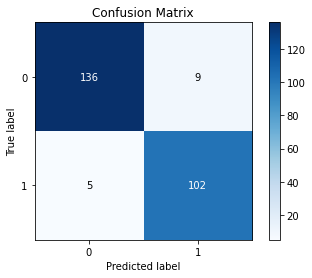

In [66]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga']
}

lr_model = LogisticRegression()

grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

best_params_lr = grid_search_lr.best_params_

print(best_params_lr)

{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


In [71]:
lr_model_best = LogisticRegression(**best_params_lr)
lr_model_best.fit(X_train, y_train)
lr_accuracy = lr_model_best.score(X_test, y_test)

In [72]:
print(lr_accuracy)

0.8650793650793651


In [73]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeClassifier()

grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_

In [74]:
print(best_params_dt)

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [75]:
dt_model_best = DecisionTreeClassifier(**best_params_dt)
dt_model_best.fit(X_train, y_train)
dt_accuracy = dt_model_best.score(X_test, y_test)

In [76]:
dt_accuracy

0.9563492063492064

In [77]:
param_grid_rf = {
    'n_estimators': [10, 25, 50 ,75],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier()

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
print(best_params_rf)

{'bootstrap': True, 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}


In [78]:
rf_model_best = RandomForestClassifier(**best_params_rf)
rf_model_best.fit(X_train, y_train)
rf_accuracy = rf_model_best.score(X_test, y_test)

In [79]:
print(rf_accuracy)

0.9603174603174603


In [82]:
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svc_model = SVC()

grid_search_svc = GridSearchCV(svc_model, param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)

best_params_svc = grid_search_svc.best_params_
print(best_params_svc)

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [85]:
svc_model_best = SVC(**best_params_svc)
svc_model_best.fit(X_train, y_train)
svc_accuracy = svc_model_best.score(X_test, y_test)
print(svc_accuracy)

0.9801587301587301
